## SMS Classifier-SMS Spam Collection

Task 1 @ Bharat Intern

Task: Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.

Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data

About the dataset:
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
The dataset includes messages from various sources, such as the Grumbletext Web site, NUS SMS Corpus, Caroline Tag's PhD Thesis, and SMS Spam Corpus v.0.1 Big.

In [ ]:
#Importing the required libraries

import pandas as pd
import numpy as np

In [ ]:
ds = pd.read_csv('spam.csv', encoding='latin-1')
ds = ds.rename(columns={'v1': 'label', 'v2': 'message'})
ds.head()

label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

The labels in the dataset are encoded to numerical values using the map function.

In [ ]:
ds['label_encoded'] = ds['label'].map({'ham': 0, 'spam': 1})
ds.head()

label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  label_encoded  
0        NaN        NaN              0  
1        NaN        NaN              0  
2        NaN        NaN              1  
3        NaN        NaN              0  
4        NaN        NaN              0

In [ ]:
The labels are visualized using a pie chart to show their distribution.

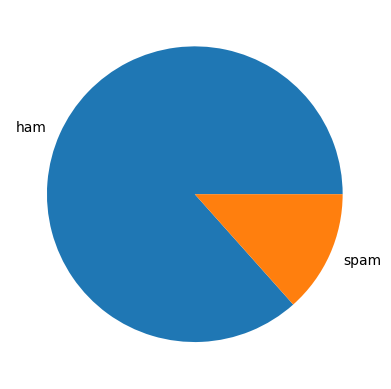

In [ ]:
import matplotlib.pyplot as plt

plt.pie(ds.label.value_counts(), labels=['ham', 'spam'])
plt.show()

To find the average number of words in a message:

In [ ]:
avg_word_count_ds = round(sum([len(i.split()) for i in ds['message']]) / len(ds['message']))
avg_word_count_ds

15

To find the number of unique words in the dataset:

In [ ]:
# Find the number of unique words in the dataset

word_set_ds = set()
for i in ds.message:
    for j in i.split():
        word_set_ds.add(j)

total_words_length_ds = len(word_set_ds)
print(total_words_length_ds)

15585


Lets split the data into training and testing sets using the train_test_split function from sklearn.
The x values are the messages and the y values are the labels.

In [ ]:
# Split the dataset into Test and Train sets

from sklearn.model_selection import train_test_split

x_ds = ds['message']
y_ds = ds['label_encoded']

x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(x_ds, y_ds, test_size=0.2)

Lets vectorize the messages using the TF-IDF vectorizer.
The TF-IDF vectorizer will then transform the text into meaningful representation of integers or numbers which is used to fit machine learning algorithm for predictions.
TF-IDF can be used to tell how important or relevant a word is in the document.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec_ds = TfidfVectorizer().fit(x_train_ds)
x_train_vec_ds, x_test_vec_ds = tfidf_vec_ds.transform(x_train_ds), tfidf_vec_ds.transform(x_test_ds)

Lets create a base model using the Multinomial Naive Bayes classifier which is a popular algorithm for natural language processing.
Note that the vectorized training set is used for training.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

baseline_model_ds = MultinomialNB()
baseline_model_ds.fit(x_train_vec_ds, y_train_ds)

MultinomialNB()

Now, the Prediction is done using this base model and the accuracy is displayed.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_ds = baseline_model_ds.predict(x_test_vec_ds)

nb_accuracy_ds = accuracy_score(y_test_ds, y_pred_ds)
print(nb_accuracy_ds)
print(classification_report(y_test_ds, y_pred_ds))

0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       974
           1       1.00      0.70      0.82       141

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



Now, Lets Calculate & Display the Confusion Matrix.

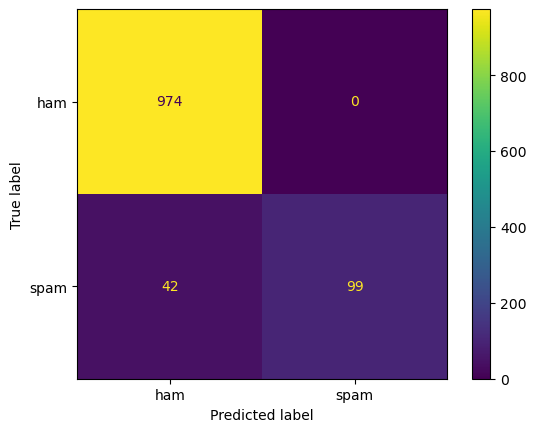

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig_ds = ConfusionMatrixDisplay(confusion_matrix(y_test_ds, y_pred_ds), display_labels=['ham', 'spam'])
fig_ds.plot()

From the confusion matrix we can infer that the model has a high false positive rate.

Next we use a different vectorization tool from TensorFlow called the Keras Text Vectorization layer. This layer will vectorize the text into integers and then pad the text to make all the text the same length.

The max_tokens parameter is used to specify the maximum number of words to be used in the vocabulary.
The standardize parameter is used to specify any preprocessing to be done on the text. In this case we convert all the text to lowercase and remove punctuation.
The output_mode parameter is used to specify the output of the vectorization layer.
The output_sequence_length parameter is used to specify the length of the output sequence.
The vectorization layer is then adapted to the training data.

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS = total_words_length_ds
OUTPUTLEN = avg_word_count_ds

text_vec_ds = TextVectorization(max_tokens=MAXTOKENS,
                            standardize='lower_and_strip_punctuation',
                            output_mode='int',
                            output_sequence_length=OUTPUTLEN)

text_vec_ds.adapt(x_train_ds)

2024-01-05 23:30:26.768854: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Next we define an Embedding layer which is a layer in TensorFlow Keras that is used to represent words as vectors of numbers. Embedding layers are used to show the relationships between words which can be used for deep learning tasks such as text classification.

In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer_ds = Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

We then define a set of user defined helper functions to create a model, train the model, and evaluate the model. These can be used for all future models created in this notebook.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow import keras

def compile_model(model):
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])


def fit_model(model, epochs, x_train_ds=x_train_ds, y_train_ds=y_train_ds, x_test_ds=x_test_ds, y_test_ds=y_test_ds):
    history = model.fit(x_train_ds, y_train_ds, epochs=epochs, validation_data=(
        x_test_ds, y_test_ds), validation_steps=int(0.2*len(x_test_ds)))
    return history


def evaluate_model(model, X_ds, y_ds):
    y_preds_ds = np.round(model.predict(X_ds))
    accuracy_ds = accuracy_score(y_ds, y_preds_ds)
    precision_ds = precision_score(y_ds, y_preds_ds)
    recall_ds = recall_score(y_ds, y_preds_ds)
    f1_ds = f1_score(y_ds, y_preds_ds)
    model_results_dict_ds = {'accuracy': accuracy_ds,
                          'precision': precision_ds,
                          'recall': recall_ds,
                          'f1-score': f1_ds}

    return model_results_dict_ds

MODEL 1

In [ ]:
import tensorflow as tf
from tensorflow import keras

input_layer_ds = keras.layers.Input(shape=(1,), dtype=tf.string)
vec_layer_ds = text_vec_ds(input_layer_ds)
embedding_layer_model_ds = embedding_layer_ds(vec_layer_ds)
x = keras.layers.GlobalAveragePooling1D()(embedding_layer_model_ds)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(32, activation='relu')(x)
output_layer_ds = keras.layers.Dense(1, activation='sigmoid')(x)
model_1_ds = keras.Model(input_layer_ds, output_layer_ds)

In [ ]:
compile_model(model_1_ds)
history_1_ds = fit_model(model_1_ds, epochs=5)

Epoch 1/5
140/140 [==============================] - 7s 36ms/step - loss: 0.3157 - accuracy: 0.8961 - val_loss: 0.1488 - val_accuracy: 0.9570
Epoch 2/5
140/140 [==============================] - 4s 27ms/step - loss: 0.0814 - accuracy: 0.9794 - val_loss: 0.0796 - val_accuracy: 0.9740
Epoch 3/5
140/140 [==============================] - 4s 27ms/step - loss: 0.0356 - accuracy: 0.9910 - val_loss: 0.0621 - val_accuracy: 0.9812
Epoch 4/5
140/140 [==============================] - 4s 26ms/step - loss: 0.0185 - accuracy: 0.9955 - val_loss: 0.0643 - val_accuracy: 0.9767
Epoch 5/5
140/140 [==============================] - 4s 27ms/step - loss: 0.0099 - accuracy: 0.9980 - val_loss: 0.0668 - val_accuracy: 0.9821


MODEL 2

In [ ]:
from tensorflow.keras import layers

input_layer_ds = layers.Input(shape=(1,), dtype=tf.string)
vec_layer_ds = text_vec_ds(input_layer_ds)
embedding_layer_model_ds = embedding_layer_ds(vec_layer_ds)
bi_lstm_ds = layers.Bidirectional(layers.LSTM(64, activation='tanh', return_sequences=True))(embedding_layer_model_ds)
lstm_ds = layers.Bidirectional(layers.LSTM(64))(bi_lstm_ds)
flatten_ds = layers.Flatten()(lstm_ds)
dropout_ds = layers.Dropout(.1)(flatten_ds)
x_ds = layers.Dense(32, activation='relu')(dropout_ds)
output_layer_ds = layers.Dense(1, activation='sigmoid')(x_ds)
model_2_ds = keras.Model(input_layer_ds, output_layer_ds)

In [ ]:
compile_model(model_2_ds)
history_2_ds = fit_model(model_2_ds, epochs=5)

Epoch 1/5
140/140 [==============================] - 27s 113ms/step - loss: 0.0482 - accuracy: 0.9888 - val_loss: 0.1381 - val_accuracy: 0.9749
Epoch 2/5
140/140 [==============================] - 13s 93ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.1014 - val_accuracy: 0.9803
Epoch 3/5
140/140 [==============================] - 14s 103ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1059 - val_accuracy: 0.9812
Epoch 4/5
140/140 [==============================] - 13s 92ms/step - loss: 6.9309e-05 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9812
Epoch 5/5
140/140 [==============================] - 13s 91ms/step - loss: 3.2511e-05 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9812


MODEL 3

In [ ]:
pip install tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow_hub as hub

model_3_ds = keras.Sequential()
use_layer_ds = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False, input_shape=[], dtype=tf.string, name='USE')
model_3_ds.add(use_layer_ds)
model_3_ds.add(layers.Dropout(0.2))
model_3_ds.add(layers.Dense(64, activation=keras.activations.relu))
model_3_ds.add(layers.Dense(1, activation=keras.activations.sigmoid))

In [ ]:
compile_model(model_3_ds)
history_3_ds = fit_model(model_3_ds, epochs=5)

Epoch 1/5
140/140 [==============================] - 9s 37ms/step - loss: 0.3191 - accuracy: 0.9091 - val_loss: 0.1157 - val_accuracy: 0.9758
Epoch 2/5
140/140 [==============================] - 5s 35ms/step - loss: 0.0835 - accuracy: 0.9782 - val_loss: 0.0674 - val_accuracy: 0.9812
Epoch 3/5
140/140 [==============================] - 4s 29ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0584 - val_accuracy: 0.9803
Epoch 4/5
140/140 [==============================] - 4s 27ms/step - loss: 0.0464 - accuracy: 0.9861 - val_loss: 0.0500 - val_accuracy: 0.9839
Epoch 5/5
140/140 [==============================] - 4s 30ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.0478 - val_accuracy: 0.9848


Model Analysis

We use the helper functions to evaluate the models.

In [ ]:
baseline_model_results_ds = evaluate_model(baseline_model_ds, x_test_vec_ds, y_test_ds)
model_1_results_ds = evaluate_model(model_1_ds, x_test_ds, y_test_ds)
model_2_results_ds = evaluate_model(model_2_ds, x_test_ds, y_test_ds)
model_3_results_ds = evaluate_model(model_3_ds, x_test_ds, y_test_ds)

total_results_ds = pd.DataFrame({'MultinomialNB Model': baseline_model_results_ds,
                             'Custom-Vec-Embedding Model': model_1_results_ds,
                              'Bidirectional-LSTM Model': model_2_results_ds,
                              'USE-Transfer learning Model': model_3_results_ds}).transpose()

total_results_ds

35/35 [==============================] - 2s 14ms/step


accuracy  precision    recall  f1-score
MultinomialNB Model          0.962332   1.000000  0.702128  0.825000
Custom-Vec-Embedding Model   0.982063   0.941606  0.914894  0.928058
Bidirectional-LSTM Model     0.981166   0.961538  0.886525  0.922509
USE-Transfer learning Model  0.984753   0.969697  0.907801  0.937729

<AxesSubplot:>

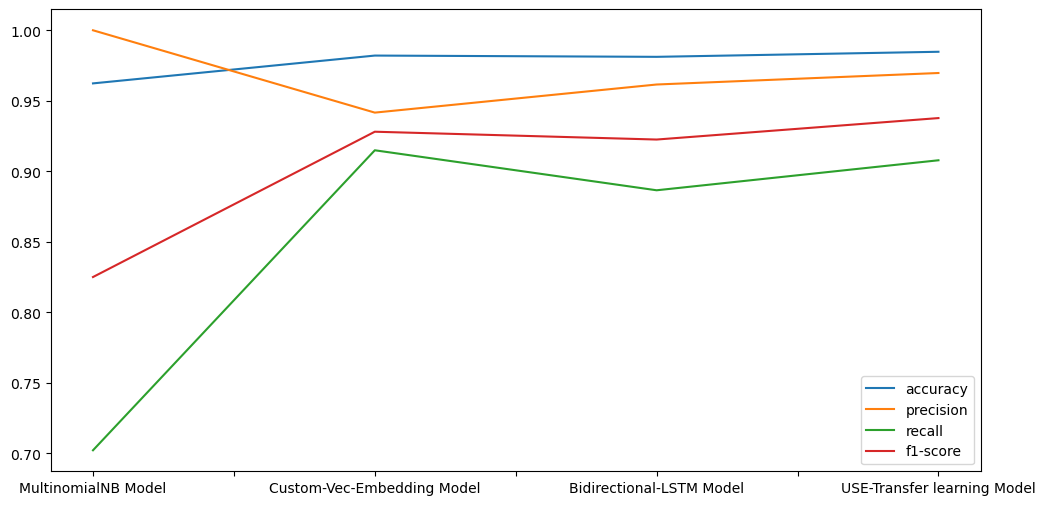

In [ ]:
total_results_ds.plot(figsize=(12, 6))

Thank You!